In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [131]:
data = pd.read_csv('2.csv')
data

,Device Name,Instance Name,Updated time (America/Los_Angeles),Packet Rate
0,csn501,network.interface.packets.in,07-Mar-2016 04:00:00 PM,559.27
1,csn501,network.interface.packets.in,07-Mar-2016 05:00:00 PM,564.02
2,csn501,network.interface.packets.in,07-Mar-2016 06:00:00 PM,580.97
3,csn501,network.interface.packets.in,07-Mar-2016 07:00:00 PM,565.64
4,csn501,network.interface.packets.in,07-Mar-2016 08:00:00 PM,549.09
...,...,...,...,...
329,csn501,network.interface.packets.out,14-Mar-2016 11:00:00 AM,786.27
330,csn501,network.interface.packets.out,14-Mar-2016 12:00:00 PM,767.67
331,csn501,network.interface.packets.out,14-Mar-2016 01:00:00 PM,782.03
332,csn501,network.interface.packets.out,14-Mar-2016 02:00:00 PM,831.24


In [132]:
data = data[data['Instance Name'] == 'network.interface.packets.in']
data.iloc[:,3]

0      559.27
1      564.02
2      580.97
3      565.64
4      549.09
        ...  
162    576.76
163    569.96
164    573.23
165    607.92
166    674.72
Name: Packet Rate, Length: 167, dtype: float64

In [133]:
new_data = data.iloc[:,[2,3]]
new_data.set_index('Updated time (America/Los_Angeles)', inplace=True)
new_data

,Packet Rate
Updated time (America/Los_Angeles),
07-Mar-2016 04:00:00 PM,559.27
07-Mar-2016 05:00:00 PM,564.02
07-Mar-2016 06:00:00 PM,580.97
07-Mar-2016 07:00:00 PM,565.64
07-Mar-2016 08:00:00 PM,549.09
...,...
14-Mar-2016 11:00:00 AM,576.76
14-Mar-2016 12:00:00 PM,569.96
14-Mar-2016 01:00:00 PM,573.23


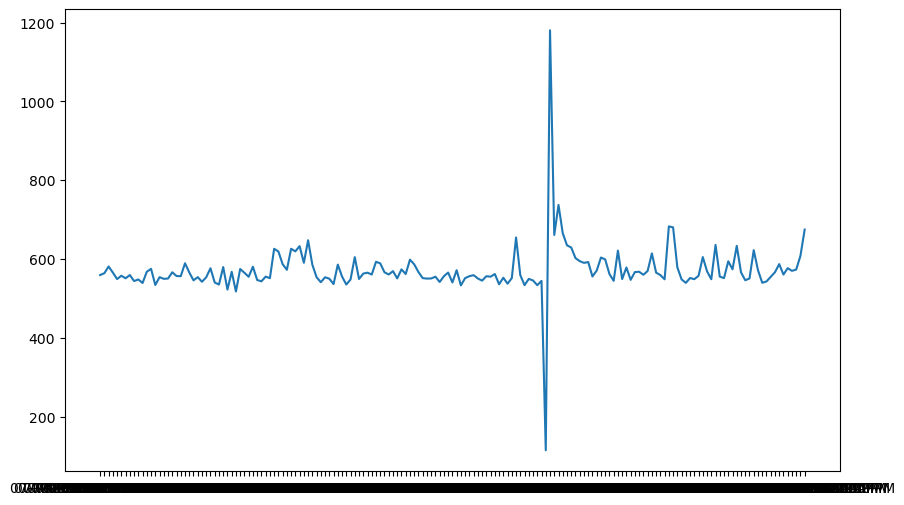

In [134]:
plt.figure(figsize=(10,6))
plt.plot(new_data)

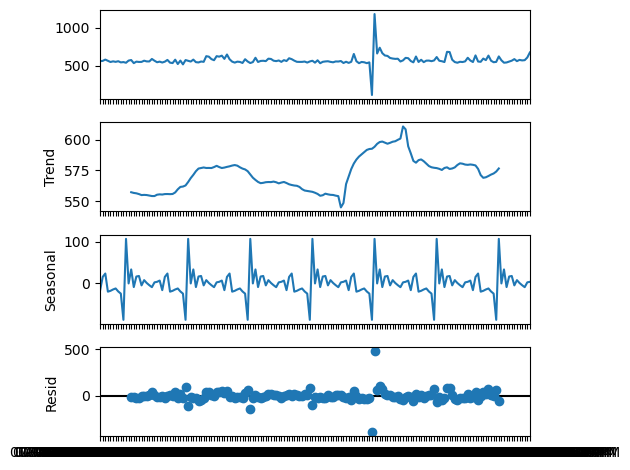

In [135]:
results = seasonal_decompose(new_data,model='additve', period=24)
results.plot()
plt.show()

In [136]:
# Split the data into training and testing sets
train_data = new_data[:int(len(new_data) * 0.8)]
test_data = new_data[int(len(new_data) * 0.8):]
train_data

,Packet Rate
Updated time (America/Los_Angeles),
07-Mar-2016 04:00:00 PM,559.27
07-Mar-2016 05:00:00 PM,564.02
07-Mar-2016 06:00:00 PM,580.97
07-Mar-2016 07:00:00 PM,565.64
07-Mar-2016 08:00:00 PM,549.09
...,...
13-Mar-2016 12:00:00 AM,559.99
13-Mar-2016 01:00:00 AM,569.63
13-Mar-2016 03:00:00 AM,614.26


In [137]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [138]:
# Create the LSTM model
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout
from keras.layers import LSTM
# from keras.utils import np_utils

model = Sequential()
model.add(LSTM(128, input_shape=(train_data_scaled.shape[1], 1)))
model.add(Dense(1))
# Compile the model
model.compile(loss='mse', optimizer='adam')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [150]:
# Train the model
model.fit(train_data_scaled, train_data_scaled, epochs=10)

# Make predictions on the test data
test_predictions_scaled = model.predict(test_data_scaled)

model.summary()

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4869e-04 
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5292e-04 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8999e-04 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3719e-04
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8494e-04 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5449e-04 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3895e-04
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0745e-04
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4648e-04
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3162e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,069 (781.52 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,380 (521.02 KB)

In [151]:
score = model.evaluate(train_data_scaled,train_data_scaled)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5198e-04 


In [152]:
loss_per_epoch = model.history.history['loss']
plt.plot(loss_per_epoch)

KeyError: 'loss'

In [164]:
test_predictions = scaler.inverse_transform(test_predictions_scaled)
test_data_descaled = scaler.inverse_transform(test_data_scaled)
train_data_descaled = scaler.inverse_transform(train_data_scaled)
test_data.index

Index(['13-Mar-2016 06:00:00 AM', '13-Mar-2016 07:00:00 AM',
       '13-Mar-2016 08:00:00 AM', '13-Mar-2016 09:00:00 AM',
       '13-Mar-2016 10:00:00 AM', '13-Mar-2016 11:00:00 AM',
       '13-Mar-2016 12:00:00 PM', '13-Mar-2016 01:00:00 PM',
       '13-Mar-2016 02:00:00 PM', '13-Mar-2016 03:00:00 PM',
       '13-Mar-2016 04:00:00 PM', '13-Mar-2016 05:00:00 PM',
       '13-Mar-2016 06:00:00 PM', '13-Mar-2016 07:00:00 PM',
       '13-Mar-2016 08:00:00 PM', '13-Mar-2016 09:00:00 PM',
       '13-Mar-2016 10:00:00 PM', '13-Mar-2016 11:00:00 PM',
       '14-Mar-2016 12:00:00 AM', '14-Mar-2016 01:00:00 AM',
       '14-Mar-2016 02:00:00 AM', '14-Mar-2016 03:00:00 AM',
       '14-Mar-2016 04:00:00 AM', '14-Mar-2016 05:00:00 AM',
       '14-Mar-2016 06:00:00 AM', '14-Mar-2016 07:00:00 AM',
       '14-Mar-2016 08:00:00 AM', '14-Mar-2016 09:00:00 AM',
       '14-Mar-2016 10:00:00 AM', '14-Mar-2016 11:00:00 AM',
       '14-Mar-2016 12:00:00 PM', '14-Mar-2016 01:00:00 PM',
       '14-Mar-2016 02:0

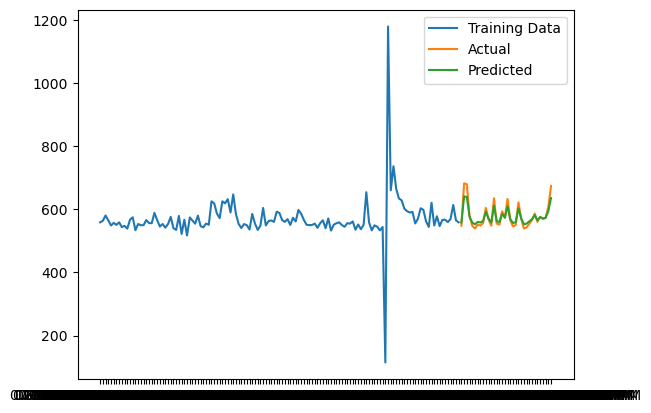

In [167]:
# Plot the results
plt.plot(train_data.index, train_data_descaled, label = 'Training Data')
plt.plot(test_data.index, test_data_descaled, label='Actual')
plt.plot(test_data.index, test_predictions, label='Predicted')
# plt.plot(train_data_scaled, label = 'Train')
plt.legend()
plt.savefig('Sequential.jpeg')
plt.show()

In [155]:
mae = mean_absolute_error(test_data_descaled,test_predictions)
mse = mean_squared_error(test_data_descaled,test_predictions)
mape = mean_absolute_percentage_error(test_data_descaled,test_predictions)
rmse = root_mean_squared_error(test_data_descaled,test_predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RSME: {rmse}')

MAE: 11.185137652228855
MSE: 239.57713896581527
MAPE: 0.018486708714419976
RSME: 15.478279586756898


In [84]:
%store -r Models

In [86]:
Models

,Model,MAE,MAPE,MSE,RMSE
0,SARIMA,43.226426,0.073251,3196.550691,56.538046
1,ARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
2,Prophet,18.35296947316519,0.03107661982469522,544.2415815991504,23.32898586735288


In [116]:
Models.loc[3] = ['Sequential', '4.567376206341909', '0.007501287741478644', '41.98243700601323', '6.479385542319058']

In [117]:
Models

,Model,MAE,MAPE,MSE,RMSE
0,SARIMA,43.226426,0.073251,3196.550691,56.538046
1,ARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
2,Prophet,18.35296947316519,0.03107661982469522,544.2415815991504,23.32898586735288
3,Sequential,4.567376206341909,0.007501287741478644,41.98243700601323,6.479385542319058


In [118]:
%store Models

Stored 'Models' (DataFrame)


In [170]:
%store -r Models
Models

,Model,MAE,MAPE,MSE,RMSE
0,SARIMA,43.226426,0.073251,3196.550691,56.538046
1,ARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
2,Prophet,18.35296947316519,0.03107661982469522,544.2415815991504,23.32898586735288
3,Sequential,4.567376206341909,0.007501287741478644,41.98243700601323,6.479385542319058


In [171]:
Models.loc[0,'Model'] = 'ARIMA'

In [172]:
Models

,Model,MAE,MAPE,MSE,RMSE
0,ARIMA,43.226426,0.073251,3196.550691,56.538046
1,ARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
2,Prophet,18.35296947316519,0.03107661982469522,544.2415815991504,23.32898586735288
3,Sequential,4.567376206341909,0.007501287741478644,41.98243700601323,6.479385542319058


In [173]:
Models.loc[1, 'Model'] = 'SARIMA'

In [174]:
Models

,Model,MAE,MAPE,MSE,RMSE
0,ARIMA,43.226426,0.073251,3196.550691,56.538046
1,SARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
2,Prophet,18.35296947316519,0.03107661982469522,544.2415815991504,23.32898586735288
3,Sequential,4.567376206341909,0.007501287741478644,41.98243700601323,6.479385542319058


In [176]:
Models.to_csv('Models.csv')

In [177]:
%store Models

Stored 'Models' (DataFrame)
